# Quantum Random Walk

### Project on simulation of wave propagation using quantum walk techniques. The applications of random walks are enormous ranging from algorithm in tree  traversal to simple illustration of Galton board.

###  In random walk, a walker or particle can jump to the left or right at the flip of a coin. After a certain number of steps, a determination of the location of the walker can be done. . 

### In the quantum version, the quantum coin is used. The analogy is by stating that the coin is neither in the head or tail but a superposition. More details can be found in https://arxiv.org/pdf/1605.02596.pdf. Figure 1, demonstrate some of the concepts. .

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
###################Beginning of functions!######################################

def BladeF(Ope,n,psin):
    
    PsiPad=np.zeros((2,n-1));
    psi=np.concatenate((psin,PsiPad),axis=1);
    Opef=Ope;
    psi=np.matrix(psi)

    for j in range(0, n):
        psi=Opef*psi;
        psi[1]=np.roll(psi[1],1,axis=1);
        
    psiR=np.concatenate((np.zeros((1,np.size(psi[1]))),psi[1]),axis=0);
    psiT=np.concatenate((psi[0],np.zeros((1,np.size(psi[1])))),axis=0);
        
    return psiR, psiT

def AbsF(psin):
    psif=np.linalg.norm(psin,ord=2,axis=0)**2;
    return psif

def PlotF(x, data1, data2=None, title=None):
    fig = plt.subplots()
    plt.plot(x, data1,'k',linewidth=3,label='O-Beam')
    plt.plot(x, data2,'b',linewidth=3,label='O-Beam')
    plt.ylabel('Probability')
    plt.xlabel('Position')
    plt.title(title)
    plt.legend()
    return fig

### Special cases of an unbiased coin

### Classical case: $G=(1,1; 1,1)/\sqrt{2}$
### Quantum case: $H=(1, -1;1, 1)/\sqrt{2}$

In [70]:
q = np.pi/4
#number of planes
n = 100
#input: equivalent to a particle at the origin
psi_in = [[0],[1]]

x = np.linspace(-1,1,100)

#Quantum Case
Had=np.matrix([[np.cos(q),np.sin(q)],[-np.sin(q),np.cos(q)]]) 
Had2=np.matrix([[1,1],[1,1]])/2

[psiT,psiR]=BladeF(Had,n,psi_in);

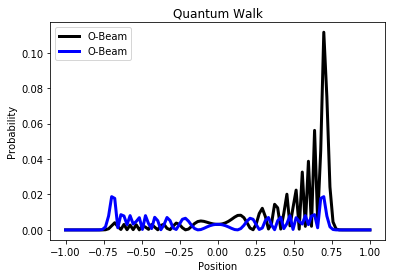

In [66]:
#Intensity
D0 = AbsF(psiT);
DH = AbsF(psiR);

figD0 = PlotF(x, D0, DH, 'Quantum Walk');

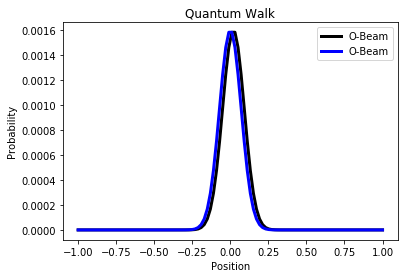

In [67]:
#Classical acse
G = np.matrix([[1,1],[1,1]])/2 
[G_right, G_left]=BladeF(G,n,psi_in);

#Intensity
figD0 = PlotF(x, AbsF(G_right), AbsF(G_left), 'Quantum Walk')

### We can notice that the intensity in the classical case peaks at the center, while the quantum case peaks at on the sides. The usefulness of this is that the speed of the search algorithm is proportional to the width of the distribution. As a result, search algorithm using quantum walks are generally faster than their classical counterparts.

### More general operator

### Classical case: $G=(q,\sqrt{1-q}; \sqrt{1-q},q)$
### Quantum case: $H=(\cos\theta, -sin\theta;\sin\theta, \cos\theta)$

### Variations in the plot as a function of the $q$ and $\theta$ parameters

In [ ]:
thata = np.linspace(np.pi/16, np.pi/)

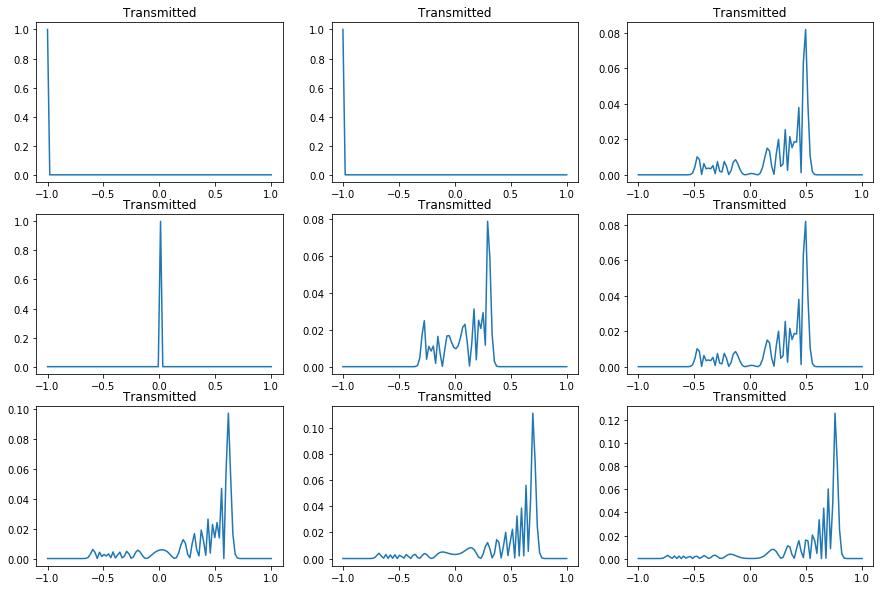

In [116]:
figsize = (15, 10)
cols = 3

#theta = [np.pi/8, np.pi/4, 2*np.pi/5, 2*np.pi/3]

theta = [2*np.pi/k for k in range(1,10)]

fig1 = plt.figure(num=1, figsize=figsize)
ax = []
for k, theta in enumerate(theta):    
    H = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    [psiT,psiR]=BladeF(H,n,psi_in)
    D0 = AbsF(psiT)
    DH = AbsF(psiR)
    ax.append(fig1.add_subplot(cols,cols,k+1))
    ax[-1].set_title('Transmitted')
    ax[-1].plot(x, D0, '-', ls='-')

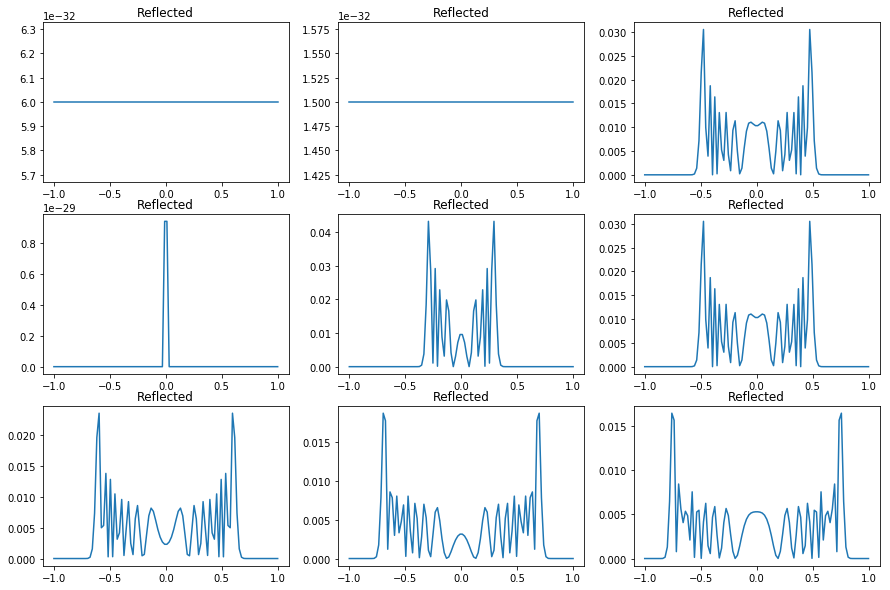

In [118]:
theta = [2*np.pi/k for k in range(1,10)]
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
for k, theta in enumerate(theta):    
    H = np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    [psiT,psiR]=BladeF(H,n,psi_in)
    D0 = AbsF(psiT)
    DH = AbsF(psiR)
    ax.append(fig1.add_subplot(cols,cols,k+1))
    ax[-1].set_title('Reflected')
    ax[-1].plot(x, DH, '-', ls='-')

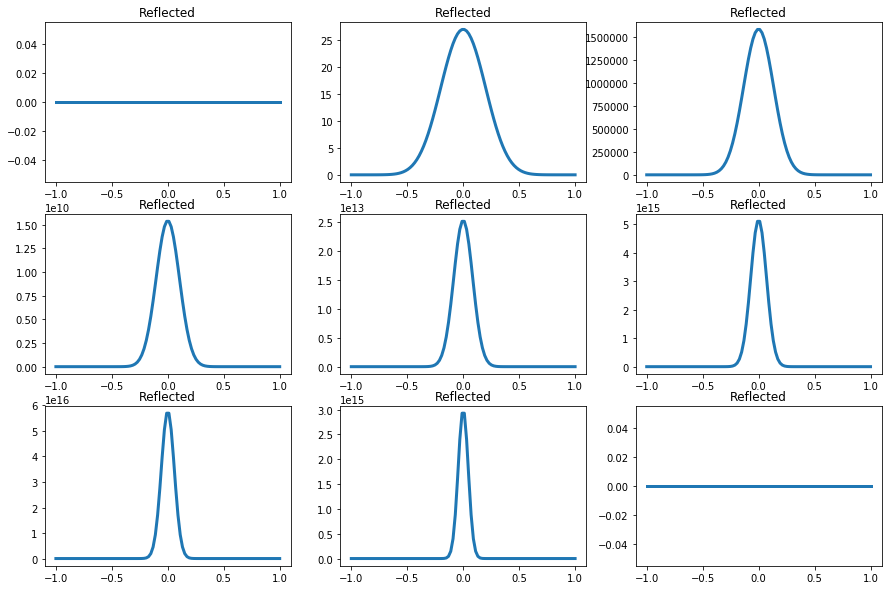

In [134]:
#Classical case:

theta = [2*np.pi/k for k in range(1,10)]
fig1 = plt.figure(num=1, figsize=figsize)
ax = []
for l,k in enumerate(np.linspace(0,1,9)):    
    G = np.matrix([[np.sqrt(1-k), k],[k, np.sqrt(1-k)]])
    [G_left,G_right]=BladeF(G,n,psi_in)
    D0 = AbsF(G_left)
    DH = AbsF(G_right)
    ax.append(fig1.add_subplot(cols, cols, l+1))
    ax[-1].set_title('Reflected')
    ax[-1].plot(x, DH, '-', linewidth=3,label= "$q =  ${}" .format(k))

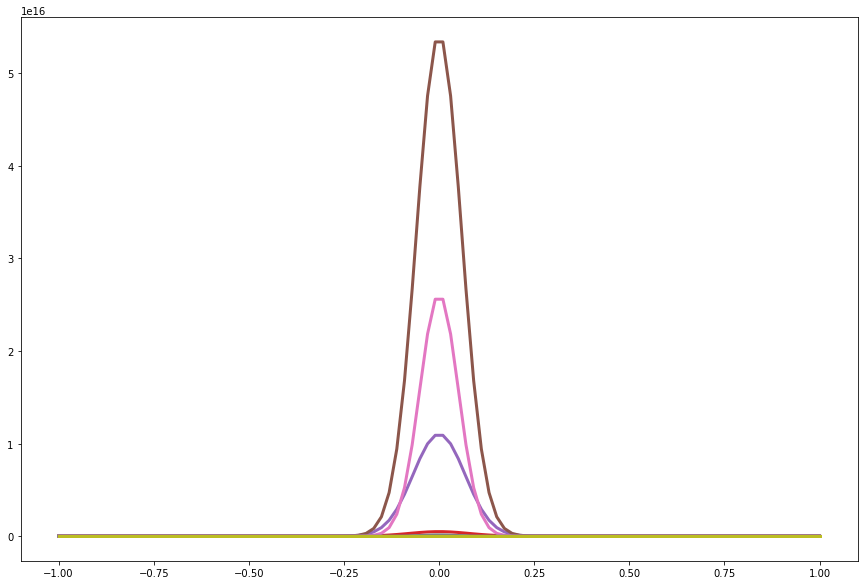

In [139]:
fig = plt.figure(figsize=figsize)
for l,k in enumerate(np.linspace(.3,1,9)):    
    G = np.matrix([[np.sqrt(1-k), k],[k, np.sqrt(1-k)]])
    [G_left,G_right]=BladeF(G,n,psi_in)
    D0 = AbsF(G_left)
    DH = AbsF(G_right)
    plt.plot(x, DH, '-', linewidth=3,  label= "$q =  ${}" .format(k))